In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import X
from random import seed
from random import randrange

In [ ]:
#Load Data
data= pd.read_csv('/content/gdrive/MyDrive/ECSE 551/MP1/Kidney disease.csv')

df = pd.DataFrame(data)

In [ ]:
# Define the header labels for the predictor variables
header_labels = ["Pregnancies: Number of times pregnant", "Glucose", "BloodPressure", "Diastolic blood pressure ", "Heart Rate", "SkinThickness", "Insulin", "BMI:Body mass", "DiabetesPedigreeFunction","Class Labels"]
# Add the header labels to the DataFrame
df.columns = header_labels
# # Display the DataFrame
print(df)

     Pregnancies: Number of times pregnant  Glucose  BloodPressure  \
0                                 0.176470  0.53769        0.50820   
1                                 0.235290  0.54774        0.52459   
2                                 0.235290  0.74372        0.49180   
3                                 0.470590  0.98492        0.62295   
4                                 0.294120  0.81407        0.85246   
..                                     ...      ...            ...   
324                               0.058824  0.54774        0.49180   
325                               0.058824  0.45226        0.50820   
326                               0.058824  0.62814        0.57377   
327                               0.058824  0.59799        0.44262   
328                               0.176470  0.50251        0.55738   

     Diastolic blood pressure   Heart Rate  SkinThickness   Insulin  \
0                     0.131310    0.056738        0.34128  0.256190   
1                

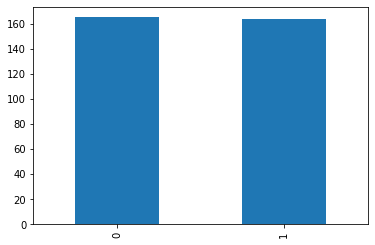

In [ ]:
###################Step 1: Data Distribution#################
#Class Distribution
class_labels = df["Class Labels"]
class_label_counts = class_labels.value_counts()
class_label_counts.plot(kind="bar")

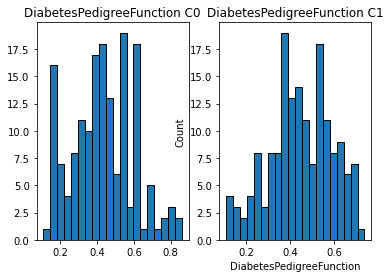

In [ ]:
# Filter the DataFrame to only include rows with Class Labels 1 or 0
#Class 1 = Good
#Class 0 Bad
class_0 = df[df['Class Labels'] == 0]
class_1 = df[df['Class Labels'] == 1]
# Plot the distribution of the "Alcohol" column for the class 1
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot data1 in first subplot
ax1.hist(class_0['DiabetesPedigreeFunction'], bins=20, edgecolor='k')
ax1.set_title('DiabetesPedigreeFunction C0')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')


# Plot data2 in second subplot
ax2.hist(class_1['DiabetesPedigreeFunction'], bins=20, edgecolor='k')
ax2.set_title('DiabetesPedigreeFunction C1')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.show()

In [ ]:
# from sklearn.utils import shuffle
# #Shuffle the dataset
# dataset = shuffle(np.array(data))
# # Save the shuffled dataset to a new file
# np.savetxt('/content/gdrive/MyDrive/ECSE 551/MP1/Kidney disease_shuffled.csv', dataset, delimiter=',')

In [ ]:
#Split Data
dataset = np.loadtxt('/content/gdrive/MyDrive/ECSE 551/MP1/Kidney disease_shuffled.csv', delimiter=',')
# Shuffle the rows of the data


X = dataset[:, [0,1,2,3,5,6,7,8]]
y = dataset[:, 9]
# Split the data into training and testing sets
train_ratio = 0.8
train_size = int(train_ratio * X.shape[0])
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

print(y.shape)
print("X_trian shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)
print(y)

(329,)
X_trian shape (263, 8)
X_test shape (66, 8)
y_train shape (263,)
y_test shape (66,)
[1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.

In [ ]:
from tqdm import tqdm
import numpy as np
import random
random.seed(3)

class LogisticRegression:
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def cost_function(self, y_train, y_predict):
        # using negative log-likelihood to calculate the cost entropy loss function
        cost = -np.mean(y_train*(np.log(y_predict)) - (1-y_train)*np.log(1-y_predict))
        return cost

    def gradient_descent(self, X_train, y_train, y_predict):
        m = X_train.shape[0]
        W_grad = (1/m)*np.dot(X_train.T, (y_predict - y_train))
        return W_grad

    def fit(self, X_train, y_train, alpha=0.01, k=50000):
        m, n = X_train.shape
        y_train = y_train.reshape(m,1)
        W_fit = np.zeros((n,1))
        loss_value = []

        for i in tqdm(range(k)):
            y_predict = self.sigmoid(np.dot(X_train, W_fit))
            w_grad = self.gradient_descent(X_train, y_train, y_predict)
            W_fit -= alpha*w_grad
        loss_fuc = self.cost_function(y_train, y_predict)
        loss_value.append(loss_fuc)
        return W_fit, loss_value

    def predict(self, X_test, W):
        y_pred = self.sigmoid(np.dot(X_test, W))
        predict_classes = []
        predict_classes = [1 if prediction > 0.5 else 0 for prediction in y_pred]
        return np.array(predict_classes)

    def accu_eval(self, y_pred, y_test):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy



    def cross_validation_split(self, X, y, folds):
        X_split = []
        y_split = []
        fold_size = int(len(X) / folds)
        for i in range(folds):
            fold_start = i * fold_size
            fold_end = fold_start + fold_size
            fold_X = X[fold_start:fold_end]
            fold_y = y[fold_start:fold_end]
            X_split.append(fold_X)
            y_split.append(fold_y)
            print(fold_X.shape, fold_y.shape)
        return np.array(X_split), np.array(y_split)

    def k_fold_cross_validation(self, X, y, k=10):
        folds = self.cross_validation_split(X, y, k)
        X_folds = folds[0]
        y_folds = folds[1]
        indices = np.arange(k)
        accuracy = 0

        # exclude index fold
        for index in range(k):
          #spliting data
          X_train = np.concatenate(X_folds[indices!= index])
          Y_train = np.concatenate(y_folds[indices!= index])   
          X_test = X_folds[index]
          Y_test = y_folds[index]
          #training
          W_fit,loss_value = self.fit(X_train, Y_train)
          print(f"Loss value for {index+1}-fold is : {loss_value}")
          #testing
          y_pred = self.predict(X_test, W_fit)
          #accuracy
          fold_accuracy= self.accu_eval(y_pred, Y_test)
          accuracy += fold_accuracy
          print(f"accuracy for {index+1}-fold is {fold_accuracy}")
        average_acc = accuracy / k
        print(average_acc)
        return W_fit





In [ ]:

logreg = LogisticRegression()
W_fit = logreg.k_fold_cross_validation(X_train, y_train)
print(W_fit)

y_predict = logreg.predict(X_test,W_fit)
acc = logreg.accu_eval(y_predict, y_test)
print(f"Accuracy is: {acc}")



(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)
(26, 8) (26,)


100%|██████████| 50000/50000 [00:04<00:00, 10960.50it/s]


Loss value for 1-fold is : [-0.050869216402636135]
accuracy for 1-fold is 0.5384615384615384


100%|██████████| 50000/50000 [00:02<00:00, 23512.28it/s]


Loss value for 2-fold is : [-0.06323251160217198]
accuracy for 2-fold is 0.6153846153846154


100%|██████████| 50000/50000 [00:02<00:00, 20703.73it/s]


Loss value for 3-fold is : [-0.05466728752516379]
accuracy for 3-fold is 0.5769230769230769


100%|██████████| 50000/50000 [00:02<00:00, 19003.17it/s]


Loss value for 4-fold is : [-0.05976439842115661]
accuracy for 4-fold is 0.7307692307692307


100%|██████████| 50000/50000 [00:03<00:00, 16305.68it/s]


Loss value for 5-fold is : [-0.05129799029909814]
accuracy for 5-fold is 0.6923076923076923


100%|██████████| 50000/50000 [00:03<00:00, 14719.15it/s]


Loss value for 6-fold is : [-0.054189180319570145]
accuracy for 6-fold is 0.6153846153846154


100%|██████████| 50000/50000 [00:01<00:00, 31859.86it/s]


Loss value for 7-fold is : [-0.051934830655271165]
accuracy for 7-fold is 0.8076923076923077


100%|██████████| 50000/50000 [00:01<00:00, 49483.25it/s]


Loss value for 8-fold is : [-0.05762694742582657]
accuracy for 8-fold is 0.5769230769230769


100%|██████████| 50000/50000 [00:00<00:00, 51059.30it/s]


Loss value for 9-fold is : [-0.0561277790914917]
accuracy for 9-fold is 0.6153846153846154


100%|██████████| 50000/50000 [00:01<00:00, 48746.46it/s]

Loss value for 10-fold is : [-0.055088153112924323]
accuracy for 10-fold is 0.7692307692307693
0.6538461538461537
[[ 1.29669487]
 [ 1.38185561]
 [-2.79788191]
 [ 0.12048165]
 [ 0.93864713]
 [ 0.73480022]
 [ 1.99729069]
 [-1.25258956]]
Accuracy is: 0.7424242424242424
